In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import tensorflow as tf 
def load_data(img_dir):
    return np.array([cv2.imread(os.path.join(img_dir, img),0).flatten().reshape(1,784) for img in os.listdir(img_dir) if img.endswith(".jpg")])

C:\Users\FESTUS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# LOADING THE DATA FROM THE FILE
x1 = load_data('0')
x2 = load_data('1')
x3 = load_data('2')
x4 = load_data('3')
x5 = load_data('4')
x6 = load_data('5')
x7 = load_data('6')
x8 = load_data('7')
x9 = load_data('8')
x10 = load_data('9')

In [3]:
#CONCANTENATING THE DATA INTO ONE FILE
X = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10), axis=0)

#CREATING THE LABEL FILE
Y = np.concatenate((np.zeros(6000),np.ones(6000), 2 * np.ones(6000), 3 * np.ones(6000), 4 * np.ones(6000), 5 * np.ones(6000), 6 * np.ones(6000), 7 * np.ones(6000), 8 * np.ones(6000), 9 * np.ones(6000)), axis = 0)

X = X.reshape(60000,784)
Y = Y.reshape(60000,1)

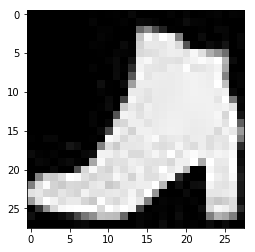

In [4]:
# VISUALIZIG THE DATA SET
plt.imshow(X[59000].reshape(28,28) , cmap ='gray')

In [5]:
from sklearn.preprocessing import OneHotEncoder
Encoder = OneHotEncoder(sparse = False)
Y_one_hot = Encoder.fit_transform(Y)

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,Y_one_hot, random_state=42)

In [6]:
x_train = X_train.astype('float32') / 255
x_test = X_test.astype('float32') / 255

In [7]:
X_train = x_train.reshape(45000,28,28,1)
X_test = x_test.reshape(15000,28,28,1)

In [8]:
# Model
model = tf.keras.Sequential()
# Add convolution 2D
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary

model.summary()

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_____________________________________________________________

In [9]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 160s 4ms/step - loss: 0.6628 - acc: 0.7518 - val_loss: 0.4228 - val_acc: 0.8486
Epoch 2/50
45000/45000 [==============================] - 153s 3ms/step - loss: 0.4512 - acc: 0.8334 - val_loss: 0.3432 - val_acc: 0.8731- loss: 0.4511 
Epoch 3/50
45000/45000 [==============================] - 150s 3ms/step - loss: 0.3967 - acc: 0.8560 - val_loss: 0.3065 - val_acc: 0.8875
Epoch 4/50
45000/45000 [==============================] - 158s 4ms/step - loss: 0.3619 - acc: 0.8660 - val_loss: 0.2907 - val_acc: 0.8936
Epoch 5/50
45000/45000 [==============================] - 155s 3ms/step - loss: 0.3423 - acc: 0.8727 - val_loss: 0.2816 - val_acc: 0.8943
Epoch 6/50
45000/45000 [==============================] - 160s 4ms/step - loss: 0.3295 - acc: 0.8775 - val_loss: 0.2650 - val_acc: 0.9023
Epoch 7/50
45000/45000 [==============================] - 161s 4ms/step - loss: 0.3193 - acc: 0.8828 - val_

In [22]:
#LOADING THE TEST IMAGES

X_predict = load_data('test--')

In [23]:
PATH = os.getcwd()
TEST_BATCH = os.listdir(os.path.join('test--'))

X_predict_names = []
for sample in TEST_BATCH:
        # remove '.jpg'
        X_predict_names.append(sample[:-4])

In [24]:
X_predict_names

['0009e3a8-5a66-402b-b848-bc7e1f048c3d',
 '000a1ee5-d907-4444-9a28-d44242d1d725',
 '001471e2-2e2b-4bd1-b79c-3574621afd7d',
 '0014d8a7-2d53-4bda-be6c-ff889a4b26ff',
 '001c0c08-70fc-40ed-bdf8-3aee3d060f8c',
 '0031a009-52f0-4c9c-bc6b-69b9b6d9aa5a',
 '00380b6e-bd67-4b03-ad8c-25fb2958ba5f',
 '003eee23-9ff6-4ea8-8eed-437c58b38a48',
 '00507f43-e15b-4aeb-9249-14df1265286c',
 '005878a9-d6cb-4cb7-bc33-382d1c61b310',
 '005d5bfd-40ec-4e2a-ad00-927be22aa088',
 '005f76c9-141d-4954-8b71-28a4caf6ddd6',
 '0069ac8e-6b54-42fd-bf32-f2d8dfd64a8f',
 '00811b3a-0b7c-45d0-bf1c-0c8f17887ce9',
 '00946867-6048-4aab-b018-7fffbba66413',
 '00964c15-37f6-427c-a332-02499b89dd81',
 '0099b1a4-ff66-49b1-b889-5440027ca838',
 '009dfbed-3dce-4682-801c-570ab1d8856d',
 '009fe531-b076-414b-9720-bd4e934a2e0f',
 '00a24b0d-5921-46af-ad29-a501c7bcd548',
 '00b3e982-fc57-43d4-94b8-436807436ed2',
 '00b79a0f-1ff2-4856-9014-5cfc9eafce5b',
 '00c69f03-3904-4fbc-bbb2-8bcd58206dd6',
 '00ce0cc6-7f2c-4a2d-9abc-49eb7464dafc',
 '00d10239-5a3c-

In [32]:
len(X_predict_names)

10000

In [25]:
X_predict.astype('float32') / 255

array([[[0.        , 0.        , 0.00392157, ..., 0.        ,
         0.        , 0.03529412]],

       [[0.01176471, 0.00784314, 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.01176471, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.05098039, 0.00392157]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)

In [26]:
X_predict = X_predict.reshape(10000,28,28,1)

In [27]:
X_predict.shape

(10000, 28, 28, 1)

In [28]:
#PREDICT THE TEST VALUES
y_hat = model.predict(X_predict)

In [29]:
classes = [np.argmax(i) for i in y_hat]

In [34]:
# CREATING THE PREDICT CSV-FILE
# creating dataframe to be used
df = pd.DataFrame(sorted(TEST_BATCH), columns=['ImageID'])
classes = pd.Series(classes)
df['Category'] = classes.values
final_df= df.to_csv('predictions--.csv', index=False)